# Data Preprocessing

> Fill in a module description here

In [ ]:
#| default_exp preprocessing

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
from esploco import esploco
from espresso import espresso
import os
import pickle
import pandas as pd

def preprocessData(input_path, output_path):
    for i in os.listdir(input_path):
        os.listdir(input_path)
        if i != '.DS_Store':
        # if i == 'TrhVGluti':
            datapath = input_path + '/' + i
            print(datapath)
            e = espresso(datapath, expt_duration_minutes=120)
            ele = esploco.esploco(datapath, 0, 120, companionEspObj = e)
            ele.calculatePeriFeedSpeed(
                e,
                monitorWindow=120,maxDuration_s = 100,  maxFeedSpeed_nl_s = 15,
                startSeconds=0,plotContrast=False)
            ele.calculateFallEvents()
            ele.feedsRevisedDf['Starved hrs'] = ele.feedsRevisedDf['Starved hrs'].dropna().astype('str')
            ele.feedsRevisedDf['Starvedhrs'] = ele.feedsRevisedDf['Starved hrs'].astype('str')
            print(ele.feedsRevisedDf.columns)
            with open(output_path + i + '_ele.pickle', 'wb') as f:
                # Pickle the 'data' dictionary using the highest protocol available.
                pickle.dump(ele, f, pickle.HIGHEST_PROTOCOL)
                
            with open(output_path + i + '_e.pickle', 'wb') as f:
            # Pickle the 'data' dictionary using the highest protocol available.
                pickle.dump(e, f, pickle.HIGHEST_PROTOCOL)
            data = ele.resultsDf[['Temperature', 'Genotype', 'Status', 'ID', 'Starvedhrs', 'MealSizePerFly_µL',
           'AverageFeedSpeedPerFly_µl/s', 'MeanSpeed120sBeforeFeed_mm/s',
           'MeanSpeedDuringFeed_mm/s', 'MeanSpeed120sAfterFeed_mm/s',
           'MeanMealDurationPerFly_s', 'AverageFeedVolumePerFly_µl', 'AverageFeedCountPerFly',
           'AverageFeedDurationPerFly_min', 'Latency_min',
           'duringBeforeSpeedRatio', 'afterBeforeSpeedRatio',
            'averageSpeed_mm/s', 'yPosition_mm', 'inLeftPort', 'inRightPort',
                                'falls',
                                'feedLogDate']]
            renamecolumns = {'Starvedhrs': 'Starvation', 
                     'MealSizePerFly_µL': 'Meal Size',
           'AverageFeedSpeedPerFly_µl/s' :'Feed Speed', 
                     'MeanSpeed120sBeforeFeed_mm/s': 'Prefeed Speed',
           'MeanSpeedDuringFeed_mm/s': 'Duringfeed Speed', 
                     'MeanSpeed120sAfterFeed_mm/s': 'Postfeed Speed',
           'MeanMealDurationPerFly_s': 'Meal Duration',
                     'AverageFeedVolumePerFly_µl': 'Volume', 
                     'AverageFeedCountPerFly': 'Count',
           'AverageFeedDurationPerFly_min': 'Duration', 
                     'Latency_min':'Latency',
           'duringBeforeSpeedRatio' : 'Duringfeed Speed Ratio',
                     'afterBeforeSpeedRatio': 'Perifeed Speed Ratio',
            'averageSpeed_mm/s' : 'Speed', 
                     'yPosition_mm': 'Height', 
                     'inLeftPort': 'Food Port Occupancy', 
                     'inRightPort': 'Ctrl Port Occupancy',
                     'falls': 'Falls', 
                                 'feedLogDate':'date' , 'Temperature': 'Light'}
    
            data = data.rename(columns = renamecolumns)
            data = data.sort_values(by = 'Status').sort_values(by = 'Light')
            data = data.drop(data.loc[data['Genotype']== 'Empty'].index, axis = 0)
            data['Starvation'] = data['Starvation'].astype(str)
            # data = data.drop(data.loc[np.isnan(data['Starvation'])].index, axis = 0)
            print(len(data))
            data.to_csv(output_path+ '/' + i + '_ele.csv', index = False)

Fontconfig warning: ignoring UTF-8: not a valid region tag


/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Behavior/Data/Females/R50H05CsChF
countLog files found: 

['CountLog_2024-09-06_17-25-11.csv' 'CountLog_2024-09-11_12-22-29.csv'
 'CountLog_2024-09-16_17-20-57.csv']

metaData files found: 

['MetaData_2024-09-06_17-25-11.csv' 'MetaData_2024-09-06_17-25-14.csv'
 'MetaData_2024-09-11_12-22-29.csv' 'MetaData_2024-09-11_12-22-31.csv'
 'MetaData_2024-09-16_17-20-57.csv' 'MetaData_2024-09-16_17-21-00.csv']
portLocations files found: 

['PortLocations_2024-09-06_17-25-14.csv'
 'PortLocations_2024-09-11_12-22-31.csv'
 'PortLocations_2024-09-16_17-21-00.csv']

feedLog files found: 

['FeedLog_2024-09-06_17-25-14.csv' 'FeedLog_2024-09-11_12-22-31.csv'
 'FeedLog_2024-09-16_17-21-00.csv']
CountLog_2024-09-06_17-25-11.csv
MetaData_2024-09-06_17-25-11.csv


/Applications/anaconda3/envs/espmanuTest/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanuTest/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanuTest/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


CountLog_2024-09-11_12-22-29.csv
MetaData_2024-09-11_12-22-29.csv
CountLog_2024-09-16_17-20-57.csv
MetaData_2024-09-16_17-20-57.csv
recalculating feed duration for feeds...

[---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------]
putting feeds back into countlog...

[--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

/Applications/anaconda3/envs/espmanuTest/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanuTest/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanuTest/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


CountLog_2024-09-11_14-47-01.csv
MetaData_2024-09-11_14-47-01.csv
CountLog_2024-09-11_17-09-38.csv
MetaData_2024-09-11_17-09-38.csv
CountLog_2024-09-12_15-05-10.csv
MetaData_2024-09-12_15-05-10.csv
recalculating feed duration for feeds...

[-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------]
putting feeds back into countlog...

[----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

/Applications/anaconda3/envs/espmanuTest/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanuTest/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanuTest/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


CountLog_2024-09-10_17-29-41.csv
MetaData_2024-09-10_17-29-41.csv
CountLog_2024-09-12_17-14-12.csv
MetaData_2024-09-12_17-14-12.csv
recalculating feed duration for feeds...

[--------------------------------------------------------------------------------------------------------------------------------------------------]
putting feeds back into countlog...

[---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

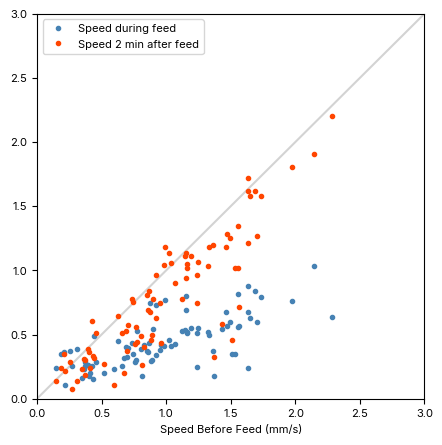

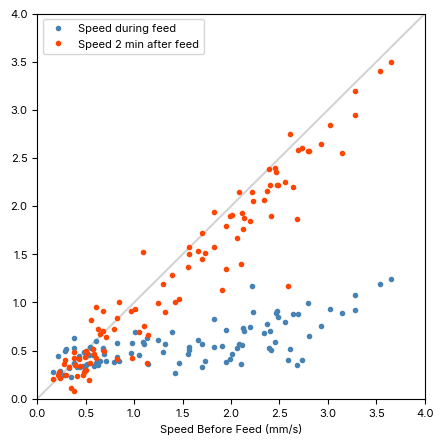

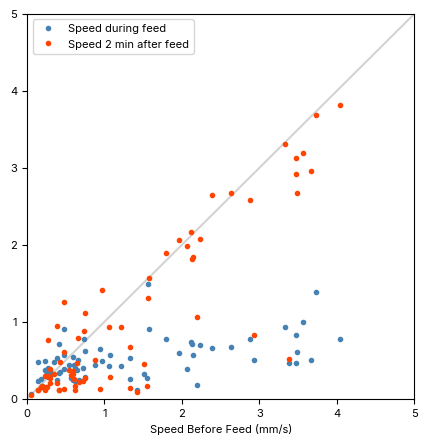

In [ ]:
datapaths = [
    # 'RNAi', 
    # 'Known Feeding Review', 
    # 'Main 5HT', 
    # 'Novel VNC Splits', 
    # 'Intersection', 
    'Females',
             # 'WT'
]
pickle_path = '/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Behavior/Data/pickles/'
for i in datapaths:
    preprocessData('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Behavior/Data/'+ i,
               pickle_path) 

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/nbdev/export.py:73: UserWarning: Notebook '/Users/sangyuxu/Documents/GitHub/Holophenotype5HT/nbs/01_Figures/07_Survival_and_RNAi.ipynb.ipynb' uses `#|export` without `#|default_exp` cell.
Note nbdev2 no longer supports nbdev1 syntax. Run `nbdev_migrate` to upgrade.
See https://nbdev.fast.ai/getting_started.html for more information.
  warn(f"Notebook '{nbname}' uses `#|export` without `#|default_exp` cell.\n"


/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Behavior/Data/Known Feeding Review/NPFACR1
countLog files found: 

['CountLog_2024-01-12_18-04-04.csv' 'CountLog_2024-07-18_14-35-11.csv'
 'CountLog_2024-07-18_16-58-27.csv']

metaData files found: 

['MetaData_2024-01-12_18-04-04.csv' 'MetaData_2024-01-12_18-04-08.csv'
 'MetaData_2024-07-18_14-35-11.csv' 'MetaData_2024-07-18_14-35-16.csv'
 'MetaData_2024-07-18_16-58-27.csv' 'MetaData_2024-07-18_16-58-31.csv']
portLocations files found: 

['PortLocations_2024-01-12_18-04-08.csv'
 'PortLocations_2024-07-18_14-35-16.csv'
 'PortLocations_2024-07-18_16-58-31.csv']

feedLog files found: 

['FeedLog_2024-01-12_18-04-08.csv' 'FeedLog_2024-07-18_14-35-16.csv'
 'FeedLog_2024-07-18_16-58-31.csv']
CountLog_2024-01-12_18-04-04.csv
MetaData_2024-01-12_18-04-04.csv


/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


CountLog_2024-07-18_14-35-11.csv
MetaData_2024-07-18_14-35-11.csv
CountLog_2024-07-18_16-58-27.csv
MetaData_2024-07-18_16-58-27.csv
recalculating feed duration for feeds...

[------------------------------------------------------------------]
putting feeds back into countlog...

[--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------]
plotting PeriFeedDiagonal
Detecting Fall Events...

[---------]
Done
Index(['Av

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


CountLog_2023-12-28_15-47-23.csv
MetaData_2023-12-28_15-47-23.csv
CountLog_2024-01-02_17-21-20.csv
MetaData_2024-01-02_17-21-20.csv
CountLog_2024-05-09_13-04-35.csv
MetaData_2024-05-09_13-04-35.csv
CountLog_2024-05-10_18-46-41.csv
MetaData_2024-05-10_18-46-41.csv
CountLog_2024-05-23_17-53-47.csv
MetaData_2024-05-23_17-53-47.csv
MetaData is missing IDs [28]
recalculating feed duration for feeds...

[------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------]
putting feeds back into countlog...

[------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


CountLog_2024-06-07_17-50-18.csv
MetaData_2024-06-07_17-50-18.csv
CountLog_2024-06-14_18-07-08.csv
MetaData_2024-06-14_18-07-08.csv
recalculating feed duration for feeds...

[---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------]
putting feeds back into countlog...

[--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


CountLog_2024-04-25_17-37-05.csv
MetaData_2024-04-25_17-37-05.csv
recalculating feed duration for feeds...

[------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------]
putting feeds back into countlog...

[-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


CountLog_2023-12-12_16-29-00.csv
MetaData_2023-12-12_16-29-00.csv
CountLog_2023-12-29_15-42-49.csv
MetaData_2023-12-29_15-42-49.csv
CountLog_2024-05-24_18-33-07.csv
MetaData_2024-05-24_18-33-07.csv
CountLog_2024-05-27_16-50-39.csv
MetaData_2024-05-27_16-50-39.csv
MetaData is missing IDs [26 27 28 29 30]
CountLog_2024-06-06_18-11-53.csv
MetaData_2024-06-06_18-11-53.csv
MetaData is missing IDs [15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]
recalculating feed duration for feeds...

[---------------------------------------------------------------------------------]
putting feeds back into countlog...

[-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


CountLog_2024-02-02_17-29-26.csv
MetaData_2024-02-02_17-29-26.csv
CountLog_2024-06-05_17-45-05.csv
MetaData_2024-06-05_17-45-05.csv
CountLog_2024-06-06_14-33-39.csv
MetaData_2024-06-06_14-33-39.csv
recalculating feed duration for feeds...

[---------------------------------------------------------------------------------------------------------------------------------------------------------------------------]
putting feeds back into countlog...

[--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:160: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return f.append(all_padrows, ignore_index=True, sort=False)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)
/Applications/anaconda3/envs/espmanu/lib/python3.9/site-packages/espresso/_munger/munger.py:302: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df.loc[:, c].cat.remove_unused_categories(inplace=True)


CountLog_2023-12-14_15-30-26.csv
MetaData_2023-12-14_15-30-26.csv
CountLog_2023-12-27_14-55-51.csv
MetaData_2023-12-27_14-55-51.csv
CountLog_2023-12-27_17-15-34.csv
MetaData_2023-12-27_17-15-34.csv
CountLog_2023-12-28_17-56-16.csv
MetaData_2023-12-28_17-56-16.csv
recalculating feed duration for feeds...

[-------------------------------------------------------------------------------------------------]
putting feeds back into countlog...

[----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

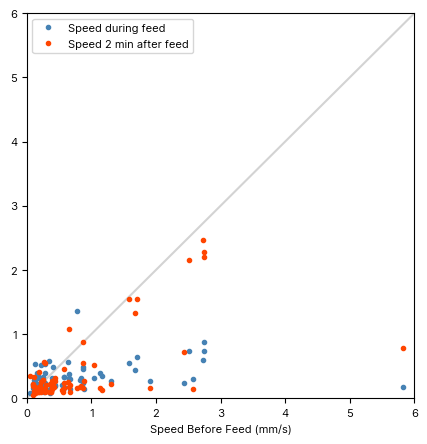

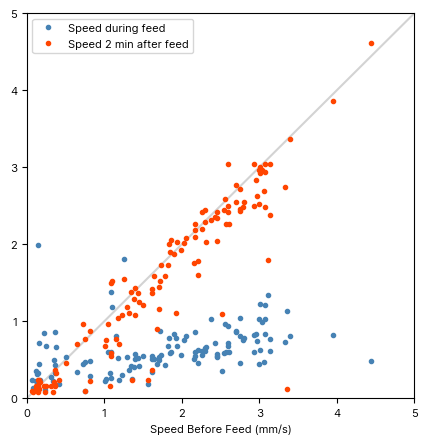

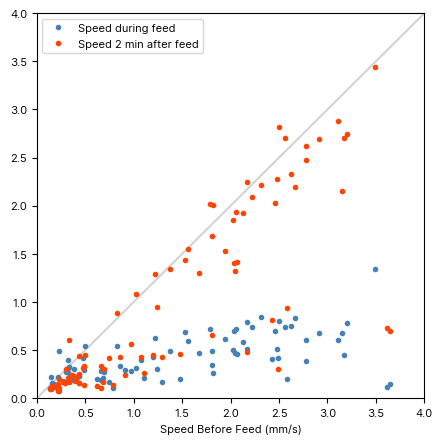

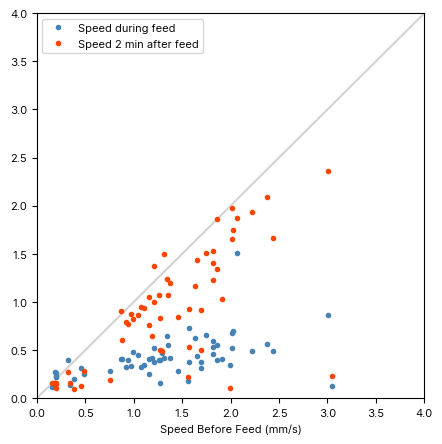

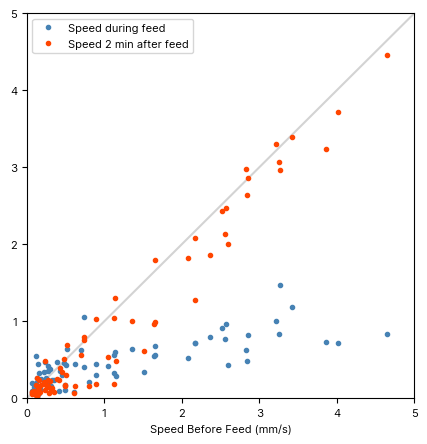

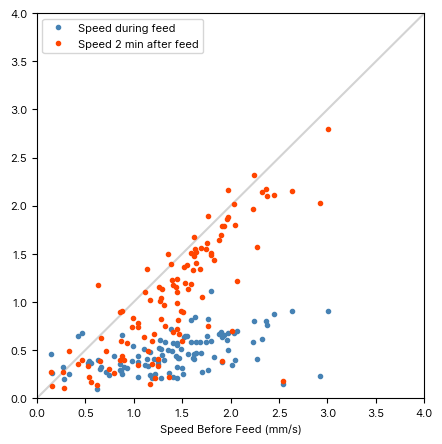

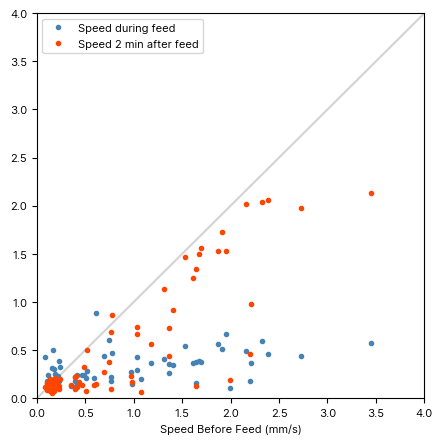

In [ ]:
preprocessData('/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/DataforFigures/Behavior/Data/'
                   + 'Known Feeding Review',pickle_path) 
